<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [116]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [117]:
# Start coding here! Use as many cells as 

netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [118]:
#The Total number of shows in the dataset
print(len(netflix_df))


4812


In [119]:
# Information about all the columns in the dataset
print(netflix_df.columns)
print("\nInformation about the columns")
print(netflix_df.info())

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

Information about the columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [120]:
#Are there any missing values 

print(netflix_df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [121]:
# We are asked to exploratory data analysis on strictly the movies

# Now let us subset the movies from the dataset

import numpy as np
print(np.unique(netflix_df['type']))
# So we only have 2 kinds of shows in this dataset: Movie and TV Show


#Now let us subset movies

movies = netflix_df[ netflix_df['type']== 'Movie']

print("The total number of movies in this dataset: ", (movies.shape)[0])



['Movie' 'TV Show']
The total number of movies in this dataset:  4677


In [122]:
# Now lets analyse the release years of all these movies

first_year = np.min(movies['release_year'].values)
last_year = np.max(movies['release_year'].values )
                    
print("The first release year: ", first_year )
print("The last release year: ", last_year)

print("So our dataset contains movies from "+ " " + str(first_year) + " " + "to" + " "+ str(last_year))


The first release year:  1942
The last release year:  2021
So our dataset contains movies from  1942 to 2021


In [123]:
# Now lets look into the movies that were released in the 1990s

import numpy as np

df = np.logical_and(movies['release_year']>= 1990, movies['release_year'] <= 1999)

movies_1990s = movies[df]

movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.

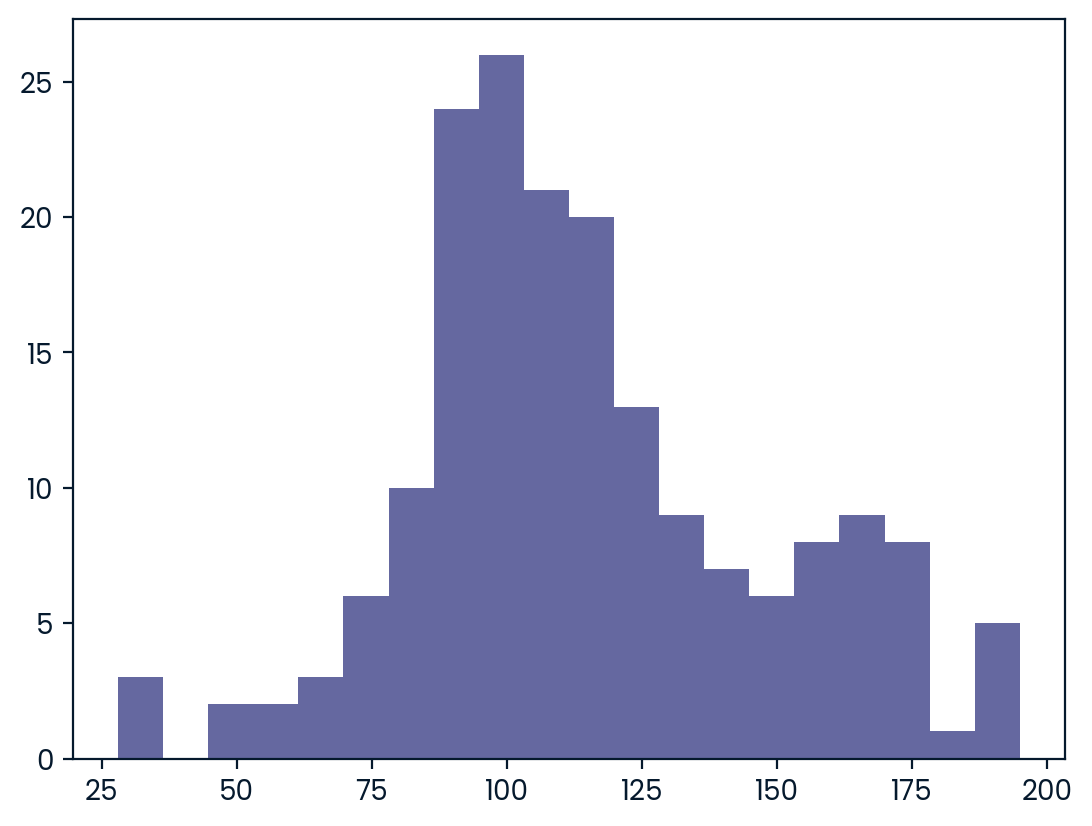

In [124]:
# So now we need to analyse the freduration of these movies

plt.hist(movies_1990s['duration'], bins = 20)

plt.show()

In [125]:
# From the above bar plot we can see that most movies had a duration around 100 minutes
# Now we will analyse these movie durations

duration_counts = movies_1990s['duration'].value_counts().sort_values(ascending = False)

print(duration_counts)

duration = duration_counts.idxmax()

print("\nThe most frequent movie duration is ", duration , "  minutes")



94     7
101    6
108    5
93     5
96     5
      ..
141    1
30     1
135    1
78     1
191    1
Name: duration, Length: 91, dtype: int64

The most frequent movie duration is  94   minutes


A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [126]:
action_movies = movies_1990s[ movies_1990s['genre'] == 'Action' ]

short_movies =action_movies[ action_movies['duration'] < 90]

short_movie_count = len(short_movies)

short_movie_count


7